# Activity 1.3 : Regularization

Ma Jenica Rose E. Mogate

CpE32S8



#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [5]:
y_train[333]

8

Check the actual image

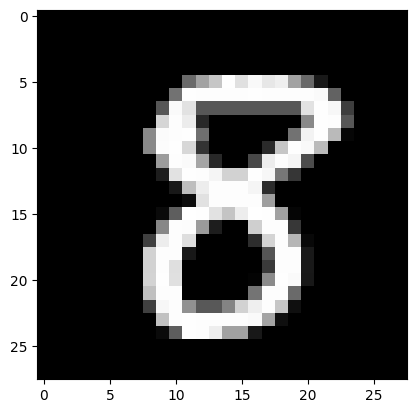

In [6]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 0.5168 - accuracy: 0.8454 - val_loss: 0.2075 - val_accuracy: 0.9357
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2558 - accuracy: 0.9255 - val_loss: 0.1605 - val_accuracy: 0.9512
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2025 - accuracy: 0.9405 - val_loss: 0.1257 - val_accuracy: 0.9604
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1753 - accuracy: 0.9480 - val_loss: 0.1233 - val_accuracy: 0.9619
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1583 - accuracy: 0.9519 - val_loss: 0.1041 - val_accuracy: 0.9692
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1447 - accuracy: 0.9571 - val_loss: 0.0985 - val_accuracy: 0.9694
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1350 - accuracy: 0.9594 - val_loss: 0.0976 - val_accuracy: 0.9701
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10237394273281097
Test accuracy: 0.9753999710083008


#Through shaping the data and testing it numerous times we can get a high accuracy rate of 97 percent. The learning rate of .001 also helped us achieve this value.

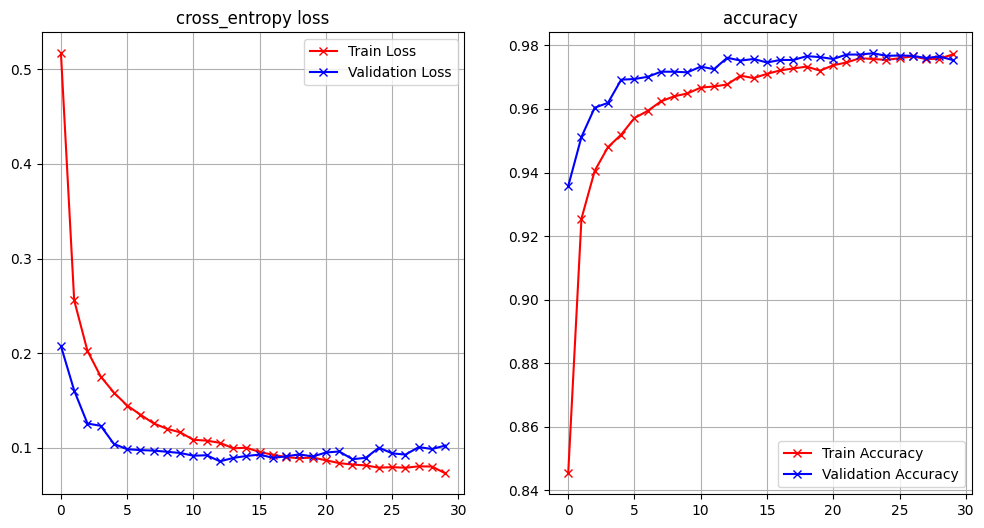

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#The values above gave an output of a just right graph. This means the there is nothing wrong with the dataset as well as its train and test data.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [15]:
#Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:
#Two hidden layers.
#First hidden layer of size 400 and second of size 300
#Dropout of .4 at each layer

model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu',))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The summary above showed the parameters used for this model. Due to the increased in the number of hidden layers, the parameters for model_1 increased as well.

In [17]:
#Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3347 - accuracy: 0.8984 - val_loss: 0.1259 - val_accuracy: 0.9619
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1537 - accuracy: 0.9542 - val_loss: 0.1017 - val_accuracy: 0.9679
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1178 - accuracy: 0.9655 - val_loss: 0.0793 - val_accuracy: 0.9746
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1011 - accuracy: 0.9698 - val_loss: 0.0729 - val_accuracy: 0.9790
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0890 - accuracy: 0.9738 - val_loss: 0.0762 - val_accuracy: 0.9764
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0794 - accuracy: 0.9768 - val_loss: 0.0692 - val_accuracy: 0.9805
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0688 - val_accuracy: 0.9807

In [26]:
#Use at least two regularization techniques and apply it to the new model (model_2)

model_2 = Sequential()
model_2.add(Dense(300, activation='tanh', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='sigmoid',))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [27]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dropout_8 (Dropout)         (None, 300)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               90300     
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
learning_rate = .01
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 50  # mini-batch with 150 examples
epochs = 10
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.3826 - accuracy: 0.8856 - val_loss: 0.1973 - val_accuracy: 0.9391
Epoch 2/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2154 - accuracy: 0.9349 - val_loss: 0.1356 - val_accuracy: 0.9582
Epoch 3/10
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1702 - accuracy: 0.9492 - val_loss: 0.1243 - val_accuracy: 0.9609
Epoch 4/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.1421 - accuracy: 0.9574 - val_loss: 0.1099 - val_accuracy: 0.9653
Epoch 5/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1254 - accuracy: 0.9622 - val_loss: 0.0943 - val_accuracy: 0.9705
Epoch 6/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.1140 - accuracy: 0.9657 - val_loss: 0.0873 - val_accuracy: 0.9740
Epoch 7/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.1074 - accuracy: 0.9679 - val_loss: 0.0823 - val_accuracy:

In [31]:
score1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss for model 1:', score1[0])
print('Test accuracy for model 1:', score1[1])

Test loss for model 1: 0.08021505922079086
Test accuracy for model 1: 0.9843000173568726


In [32]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss for model 2:', score_2[0])
print('Test accuracy for model 2:', score_2[1])

Test loss for model 2: 0.07956195622682571
Test accuracy for model 2: 0.9768000245094299


#### Conclusion

During this activity, I was able to understand how different activation function can give different results. This also showed me the big difference of training an imported dataset from the one we made ourselves. Imported datasets usually give better results due to their data.